# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chonchi
Processing Record 2 of Set 1 | ulaangom
Processing Record 3 of Set 1 | dudinka
Processing Record 4 of Set 1 | flying fish cove
Processing Record 5 of Set 1 | simanggang
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | tazovsky
Processing Record 8 of Set 1 | lospalos
Processing Record 9 of Set 1 | barakani
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | burleson
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | happy valley-goose bay
Processing Record 18 of Set 1 | karachi
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | stanley
Processing Record 21 of Set 1 | gignac
Processing Record 22 of Set 1 | constantia
Processing Record

Processing Record 42 of Set 4 | noumea
Processing Record 43 of Set 4 | diego de almagro
Processing Record 44 of Set 4 | vilyuysk
Processing Record 45 of Set 4 | boende
Processing Record 46 of Set 4 | mysen
Processing Record 47 of Set 4 | carnarvon
Processing Record 48 of Set 4 | okhotsk
Processing Record 49 of Set 4 | fort bragg
Processing Record 0 of Set 5 | reggane
Processing Record 1 of Set 5 | tekkalakote
Processing Record 2 of Set 5 | tamanrasset
Processing Record 3 of Set 5 | ibiza
Processing Record 4 of Set 5 | udachny
Processing Record 5 of Set 5 | childress
Processing Record 6 of Set 5 | camacupa
Processing Record 7 of Set 5 | hell-ville
Processing Record 8 of Set 5 | bikenibeu village
Processing Record 9 of Set 5 | nova sintra
Processing Record 10 of Set 5 | ormara
Processing Record 11 of Set 5 | ilulissat
Processing Record 12 of Set 5 | gaspar hernandez
Processing Record 13 of Set 5 | ancud
Processing Record 14 of Set 5 | mankoeng
Processing Record 15 of Set 5 | keflavik
Pro

Processing Record 34 of Set 8 | jati
Processing Record 35 of Set 8 | fisterra
Processing Record 36 of Set 8 | ruelle-sur-touvre
Processing Record 37 of Set 8 | eyl
Processing Record 38 of Set 8 | noosa heads
Processing Record 39 of Set 8 | mandalgovi
Processing Record 40 of Set 8 | banda aceh
Processing Record 41 of Set 8 | taltal
Processing Record 42 of Set 8 | la sarre
Processing Record 43 of Set 8 | dakhla
Processing Record 44 of Set 8 | khandyga
Processing Record 45 of Set 8 | prince george
Processing Record 46 of Set 8 | as salamiyah
Processing Record 47 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 48 of Set 8 | mungeli
Processing Record 49 of Set 8 | ngurore
Processing Record 0 of Set 9 | nanao
Processing Record 1 of Set 9 | palm coast
Processing Record 2 of Set 9 | vorgashor
Processing Record 3 of Set 9 | fengcheng
Processing Record 4 of Set 9 | glendive
Processing Record 5 of Set 9 | baikonur
Processing Record 6 of Set 9 | sirjan
Processing Record 7 of Set 9

Processing Record 25 of Set 12 | lashio
Processing Record 26 of Set 12 | upington
Processing Record 27 of Set 12 | conduaga
Processing Record 28 of Set 12 | motueka
Processing Record 29 of Set 12 | sydney
Processing Record 30 of Set 12 | charters towers
Processing Record 31 of Set 12 | urengoy
Processing Record 32 of Set 12 | ust'-ilimsk
Processing Record 33 of Set 12 | mahenge
Processing Record 34 of Set 12 | enriquillo
Processing Record 35 of Set 12 | mil'kovo
Processing Record 36 of Set 12 | vadso
Processing Record 37 of Set 12 | khoyniki
Processing Record 38 of Set 12 | achinsk
Processing Record 39 of Set 12 | juneau
Processing Record 40 of Set 12 | taulaga
Processing Record 41 of Set 12 | jumla
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:

# Convert the cities' weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chonchi,-42.6128,-73.8092,12.56,58,92,2.28,CL,1697314988
1,ulaangom,49.9811,92.0667,7.58,65,100,1.31,MN,1697314988
2,dudinka,69.4058,86.1778,1.49,93,100,6.71,RU,1697314872
3,flying fish cove,-10.4217,105.6791,24.82,94,100,4.63,CX,1697314989
4,simanggang,1.2472,111.4528,23.99,100,96,1.03,MY,1697314990


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,12.56,58,92,2.28,CL,1697314988
1,ulaangom,49.9811,92.0667,7.58,65,100,1.31,MN,1697314988
2,dudinka,69.4058,86.1778,1.49,93,100,6.71,RU,1697314872
3,flying fish cove,-10.4217,105.6791,24.82,94,100,4.63,CX,1697314989
4,simanggang,1.2472,111.4528,23.99,100,96,1.03,MY,1697314990


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

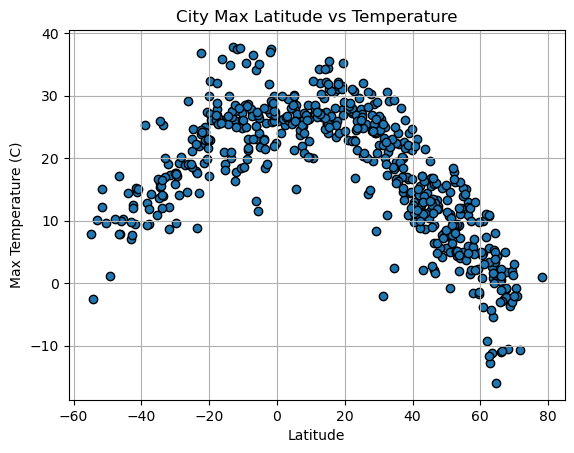

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

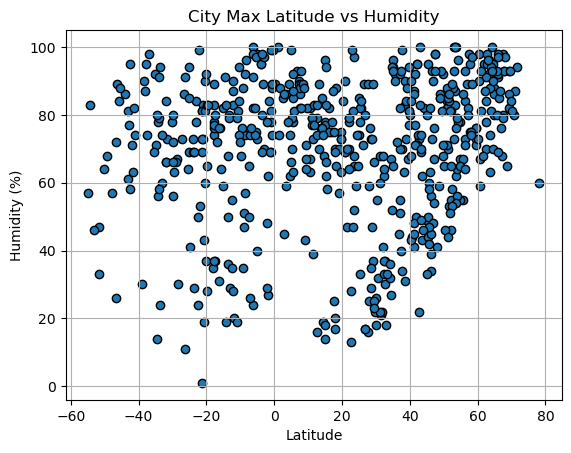

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

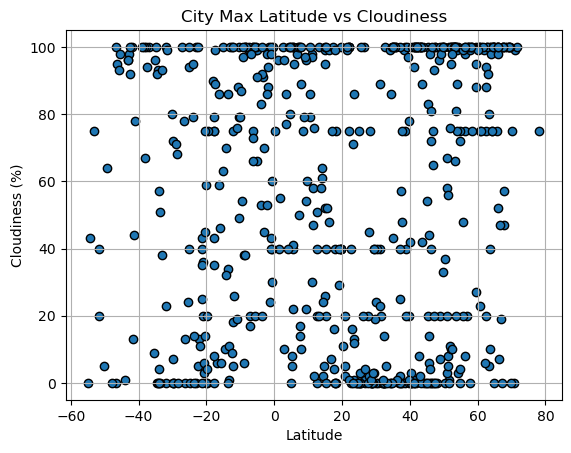

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

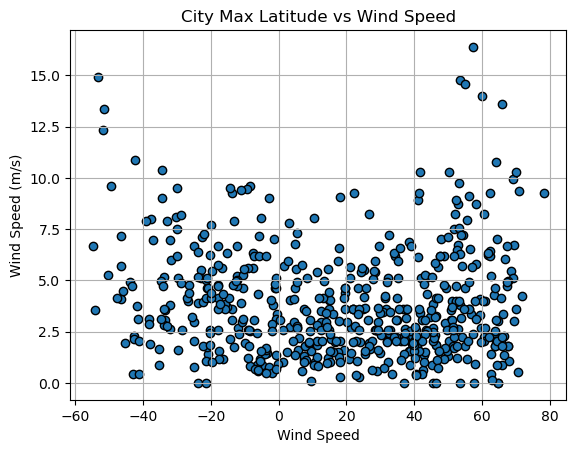

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
from scipy import stats
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere):
    # Calculate the linear regression values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
     # Create plots
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values, regress_values, "r-")
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}", fontsize=15)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    
    # Add the regression equation to the plot
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ulaangom,49.9811,92.0667,7.58,65,100,1.31,MN,1697314988
2,dudinka,69.4058,86.1778,1.49,93,100,6.71,RU,1697314872
4,simanggang,1.2472,111.4528,23.99,100,96,1.03,MY,1697314990
6,tazovsky,67.4667,78.7000,1.79,98,100,4.74,RU,1697314991
9,albany,42.6001,-73.9662,12.51,73,100,0.62,US,1697314818


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,12.56,58,92,2.28,CL,1697314988
3,flying fish cove,-10.4217,105.6791,24.82,94,100,4.63,CX,1697314989
5,invercargill,-46.4000,168.3500,7.79,89,95,7.15,NZ,1697314944
7,lospalos,-8.5186,127.0025,21.32,92,100,2.54,TL,1697314991
8,barakani,-12.1356,44.4317,25.87,87,18,5.20,KM,1697314991


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7518380741903322


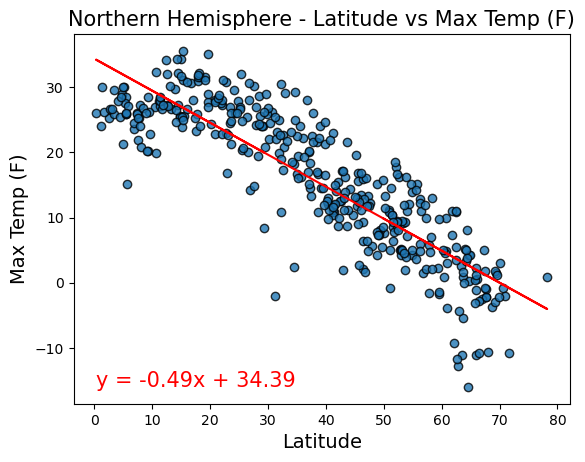

In [15]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern")

plt.savefig("output_data/Fig1.png")


# Show plot
plt.show()

The r-squared is: 0.5324173447499227


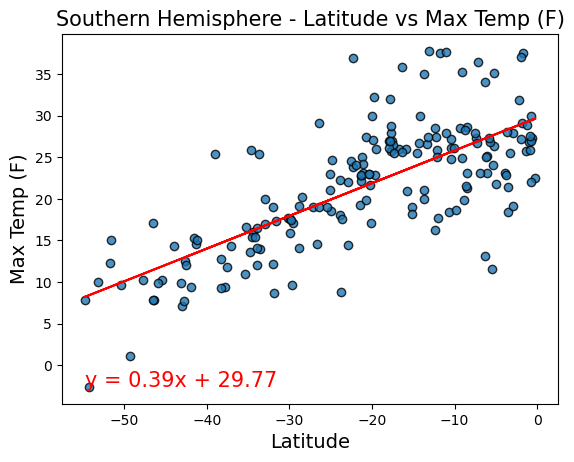

In [16]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a correlation between latitude and max temp. The closer to the equator (latitude 0) the city, the higher the maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.03227018203091569


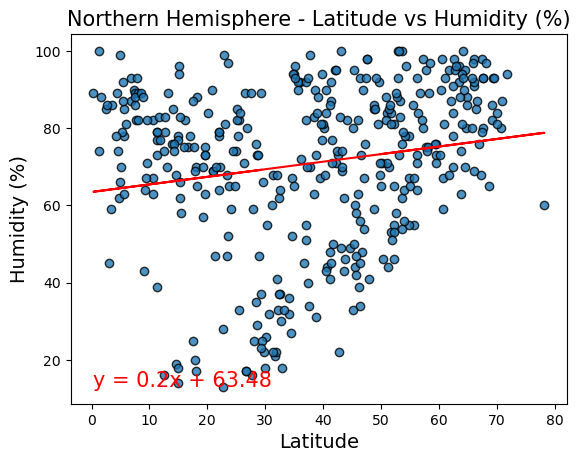

In [17]:
# Northern Hemisphere
# Build scatter plot for latitude vs. humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern")

plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

The r-squared is: 0.0047205302714749126


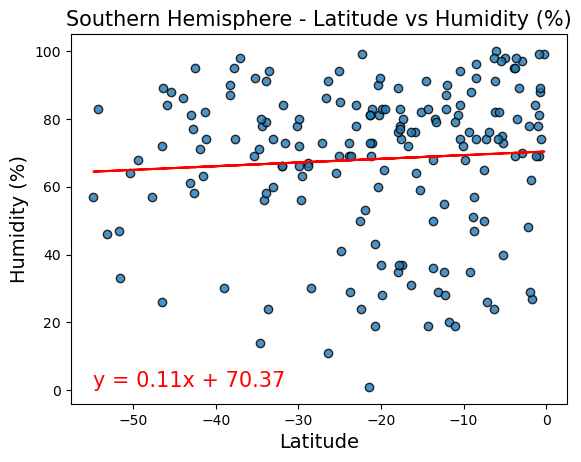

In [18]:
# Southern Hemisphere
# Build scatter plot for latitude vs. humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern")

plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Since r-squared is close to zero, that would indicate that there is no relationship between Latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.032104151561188066


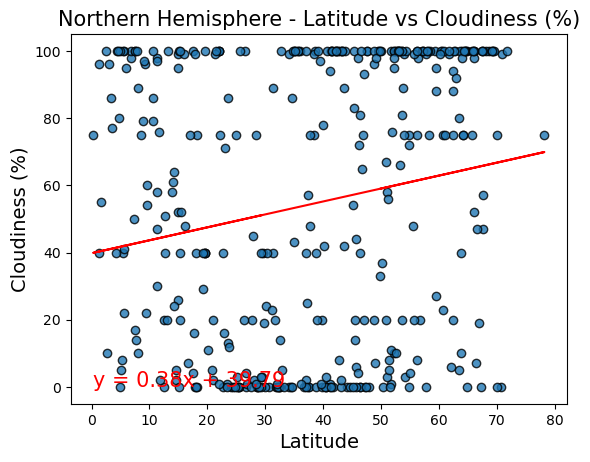

In [19]:
# Northern Hemisphere
# Build scatter plot for latitude vs. cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern")
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The r-squared is: 0.018081658148468585


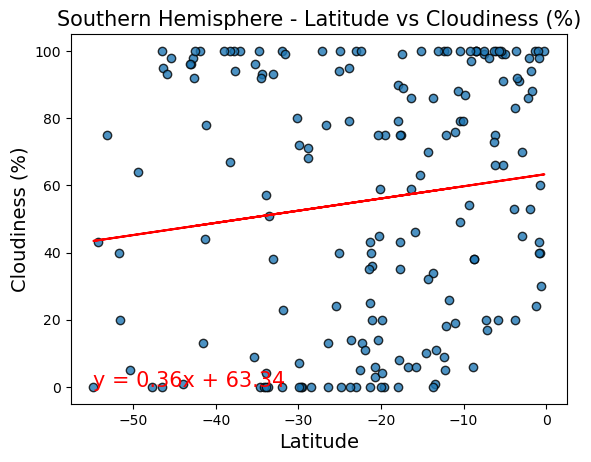

In [20]:
# Southern Hemisphere
# Build scatter plot for latitude vs. cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Southern")

plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Since r-squared is close to zero, that would indicate that there is no relationship between Latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.041171520835577534


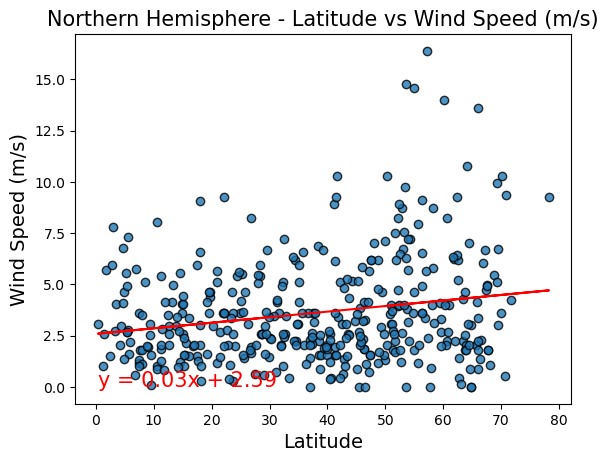

In [21]:
# Northern Hemisphere
# Build scatter plot for latitude vs. wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Northern")

plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()

The r-squared is: 0.0780305861012489


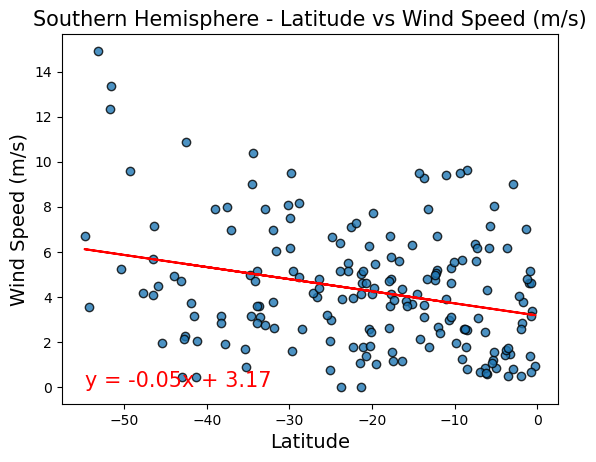

In [22]:
# Southern Hemisphere
# Build scatter plot for latitude vs. wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Southern")

plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Since r-squared is close to zero, that would indicate that there is no relationship between Latitude and wind speed.